<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Nuevas_Ideas_Politext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Se lee la base original
base=pd.read_csv('/content/drive/MyDrive/par_esp_interventions.csv')

In [4]:
# Se conservan solamente las intervenciones de los partidos PSOE y PP
base=base[(base['party'] == 'PSOE') | (base['party'] == 'PP')]

Preprocesamiento

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])

In [8]:
# Elimino de la base las intervenciones del Presidente de la cámara
base=base[(base['role'] != 'PRESIDENTE, PRESIDENTA') | (base['role'] != 'PRESIDENTE DEL CONGRESO DE LOS DIPUTADOS')]

In [9]:
base['tokens']=""

In [10]:
# Esta celda tarda unos 5 minutos en correr
for ind in base.index:
    #elimino puntuación
    non_punctuation = base['intervention'][ind].translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(non_punctuation)

    #elimino stopwords
    tokens=[w for w in word_tokens if not w.lower() in stopwords]

    #stemming
    porter_stemmer = PorterStemmer()
    stemmers = [porter_stemmer.stem(word) for word in tokens]
    base['tokens'][ind] = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# TFIDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf=TfidfVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [13]:
base['tokens']=base["tokens"].map(' '.join)

In [14]:
vecs = tfidf.fit_transform(base['tokens'])
feature_names = tfidf.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df.shape

(73707, 200)

In [16]:
df.head()

,activa empleo,actividad económica,acuerd celebración,administracion pública,administración gener,administración justicia,agencia tributaria,ahora mismo,alimentación medio,alta velocidad,...,tribun supremo,unidainiciativa per,unido podemosen,unión europea,unión progreso,vamo seguir,vamo votar,vasco pnv,ver si,violencia género
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PP

In [17]:
pp=base[base['party'] == 'PP']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [20]:
vec = cv.fit(pp['tokens']) 

In [21]:
bag_of_words = vec.transform(pp['tokens'])

In [22]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [23]:
print(words_freq[:-40])

[('comunidad autónoma', 5472), ('unión europea', 2618), ('administracion pública', 1897), ('izquierda plural', 1845), ('seguridad social', 1744), ('servicio público', 1360), ('servicio social', 1351), ('pregunta dirigida', 1347), ('creación empleo', 1303), ('presupuesto general', 1301), ('déficit público', 1292), ('crisi económica', 1280), ('economía española', 1067), ('unión progreso', 1033), ('progreso democracia', 1033), ('crecimiento económico', 1026), ('unido podemosen', 1001), ('podemen marea', 1000), ('confeder unido', 995), ('podemosen comú', 993), ('comú podemen', 992), ('telemático telemático', 957), ('fijación posicion', 943), ('convergència unió', 928), ('medio ambient', 891), ('puesto trabajo', 877), ('violencia género', 839), ('vasco pnv', 839), ('social igualdad', 838), ('política económica', 811), ('sociedad española', 801), ('recuperación económica', 779), ('vamo votar', 763), ('tribun constitucion', 728), ('toma consideración', 719), ('extraordinaria comisión', 716), 

In [24]:
tuples = [tuple(x) for x in words_freq]

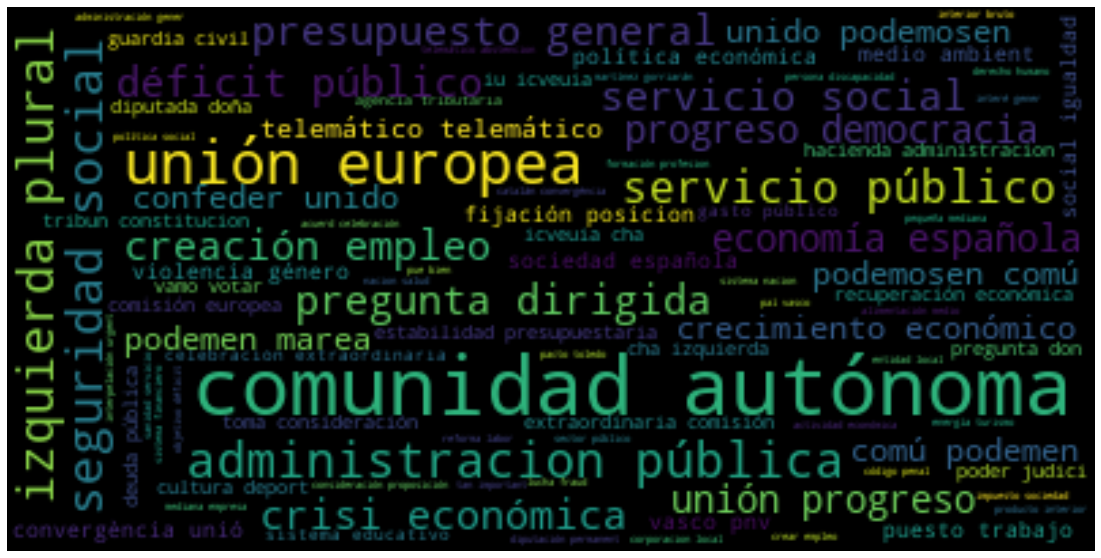

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [27]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [28]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [29]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,comunidad autónoma,5472,27.360,503
1,unión europea,2618,13.090,532
2,administracion pública,1897,9.485,1897
3,izquierda plural,1845,9.225,520
4,seguridad social,1744,8.720,260
...,...,...,...,...
195,administración justicia,260,1.300,763
196,millon parado,260,1.300,839
197,vamo seguir,258,1.290,272
198,seguir trabajando,258,1.290,839


# PSOE

In [30]:
psoe=base[base['party'] == 'PSOE']

In [31]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [32]:
vec = cv.fit(psoe['tokens']) 

In [33]:
bag_of_words = vec.transform(psoe['tokens'])

In [34]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [35]:
print(words_freq[:-40])

[('comunidad autónoma', 4822), ('unión europea', 3171), ('seguridad social', 1507), ('reforma labor', 1071), ('servicio público', 1013), ('política social', 1003), ('sistema financiero', 973), ('crisi económica', 915), ('presupuesto general', 878), ('economía española', 861), ('tribun constitucion', 841), ('violencia género', 769), ('política económica', 740), ('per catalunya', 720), ('unidainiciativa per', 714), ('catalunya verd', 706), ('comisión europea', 704), ('republicanaizquierda unidainiciativa', 691), ('deuda pública', 666), ('administracion pública', 639), ('amnistía fiscal', 603), ('poder judici', 579), ('política fiscal', 553), ('consejo europeo', 549), ('guardia civil', 545), ('puesto trabajo', 529), ('gasto público', 523), ('sociedad española', 521), ('política activa', 509), ('crecimiento económico', 508), ('cambio climático', 500), ('nacion unida', 494), ('entidad financiera', 481), ('derecho humano', 480), ('toma consideración', 475), ('medio ambient', 468), ('déficit 

In [36]:
tuples = [tuple(x) for x in words_freq]

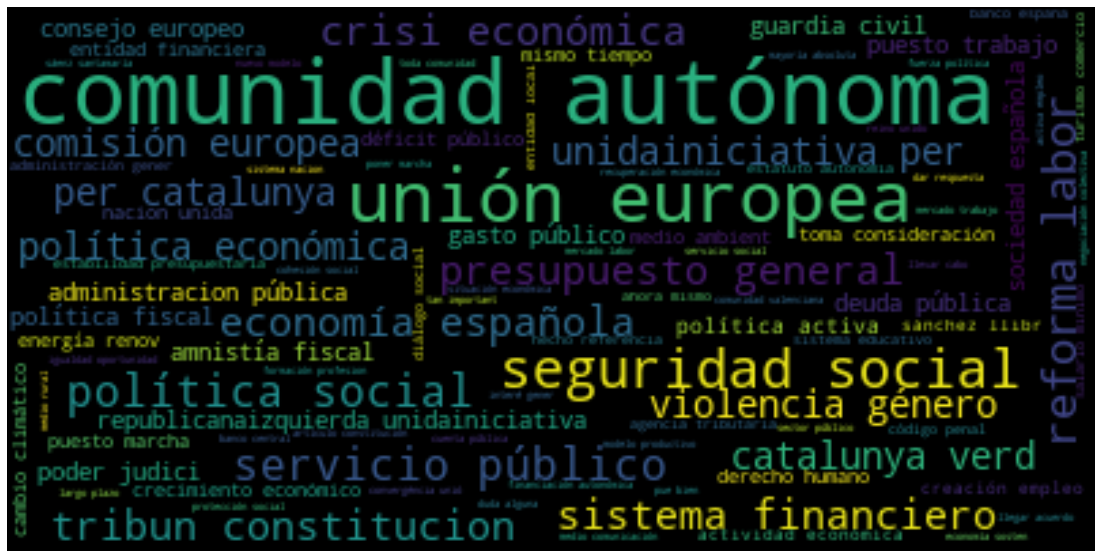

In [37]:
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [39]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [40]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [41]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,comunidad autónoma,4822,24.110,342
1,unión europea,3171,15.855,439
2,seguridad social,1507,7.535,639
3,reforma labor,1071,5.355,417
4,servicio público,1013,5.065,221
...,...,...,...,...
195,exposición motivo,214,1.070,261
196,prima riesgo,214,1.070,225
197,medida urgent,212,1.060,272
198,sector privado,211,1.055,769


# LASSO

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base.columns != 'party'], base['party'], test_size=0.33, random_state=42)

In [63]:
# Balance de clase
y_train.value_counts()

PP      31148
PSOE    18235
Name: party, dtype: int64

In [43]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)
vec = cv.fit(X_train['tokens']) 

In [44]:
train_matrix = vec.fit_transform(X_train['tokens'])
test_matrix = vec.transform(X_test['tokens'])

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')

In [91]:
lr.fit(train_matrix,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [92]:
predictions = lr.predict(test_matrix )

In [93]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[14803,  7545],
       [  547,  1429]])

In [94]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          PP       0.96      0.66      0.79     22348
        PSOE       0.16      0.72      0.26      1976

    accuracy                           0.67     24324
   macro avg       0.56      0.69      0.52     24324
weighted avg       0.90      0.67      0.74     24324



# Catboost

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 13 kB/s 


In [70]:
from catboost import CatBoostClassifier

In [77]:
cbt_model = CatBoostClassifier(iterations=1000,task_type="CPU")

In [78]:
cbt_model.fit(train_matrix,y_train)
preds = cbt_model.predict(test_matrix)

Learning rate set to 0.054462
0:	learn: 0.6864824	total: 77.5ms	remaining: 1m 17s
1:	learn: 0.6806790	total: 106ms	remaining: 52.7s
2:	learn: 0.6743256	total: 135ms	remaining: 44.7s
3:	learn: 0.6696952	total: 164ms	remaining: 40.9s
4:	learn: 0.6653473	total: 200ms	remaining: 39.7s
5:	learn: 0.6614147	total: 229ms	remaining: 38s
6:	learn: 0.6575552	total: 257ms	remaining: 36.5s
7:	learn: 0.6545390	total: 285ms	remaining: 35.4s
8:	learn: 0.6520335	total: 314ms	remaining: 34.6s
9:	learn: 0.6499473	total: 343ms	remaining: 33.9s
10:	learn: 0.6472704	total: 373ms	remaining: 33.6s
11:	learn: 0.6446049	total: 413ms	remaining: 34s
12:	learn: 0.6424889	total: 443ms	remaining: 33.6s
13:	learn: 0.6406920	total: 472ms	remaining: 33.3s
14:	learn: 0.6391943	total: 503ms	remaining: 33.1s
15:	learn: 0.6376645	total: 533ms	remaining: 32.8s
16:	learn: 0.6361568	total: 561ms	remaining: 32.5s
17:	learn: 0.6349389	total: 592ms	remaining: 32.3s
18:	learn: 0.6337469	total: 635ms	remaining: 32.8s
19:	learn: 0.

In [79]:
new = np.asarray(y_test)
confusion_matrix(preds,y_test)

array([[14580,  7083],
       [  770,  1891]])

In [80]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          PP       0.95      0.67      0.79     21663
        PSOE       0.21      0.71      0.33      2661

    accuracy                           0.68     24324
   macro avg       0.58      0.69      0.56     24324
weighted avg       0.87      0.68      0.74     24324

